In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

#### Colab GPU acilmadigindan, kaggle notebook kullandim

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from PIL import Image

im = Image.open('../input/cell-images-for-detecting-malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144348_cell_144.png')
print(im.size)
im = Image.open('../input/cell-images-for-detecting-malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144823_cell_160.png')
print(im.size)
im = Image.open('../input/cell-images-for-detecting-malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_145422_cell_163.png')
print(im.size)

(133, 136)
(142, 133)
(127, 133)


***3 resminde boyutlari farkli bu yuzden daha tek bir boyut belirlemeliyiz***

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

**directory:** *string, path to the target directory. It should contain one subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images inside each of the subdirectories directory tree will be included in the generator.*

**target_size:** *Tuple of integers (height, width), defaults to (256,256). The dimensions to which all images found will be resized.*

**class_mode:** *One of "categorical", "binary", "sparse", "input", or None. Determines the type of label arrays that are returned: "binary" will be 1D binary labels, "sparse" will be 1D integer labels,*

**batch_size:** *Size of the batches of data (default: 32).*

**subset:** *Subset of data ("training" or "validation") if validation_split is set in ImageDataGenerator.*

In [5]:
width, height = 128,128
trainDatagen = datagen.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(width,height), class_mode = 'binary', batch_size = 16, 
                                           subset='training')

valDatagen = datagen.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(width,height), class_mode = 'binary', batch_size = 16,
                                           subset='validation')

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [6]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

2022-08-17 09:15:31.637256: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-17 09:15:31.747552: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-17 09:15:31.748407: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-17 09:15:31.750192: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        1

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit_generator(generator = trainDatagen, steps_per_epoch = len(trainDatagen), epochs =20, validation_data = valDatagen,
                              validation_steps=len(valDatagen))

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-08-17 09:15:34.991564: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-08-17 09:15:36.539524: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1378/1378 [==============================] - 208s 146ms/step - loss: 0.5484 - accuracy: 0.7130 - val_loss: 0.2706 - val_accuracy: 0.9316
Epoch 2/20
1378/1378 [==============================] - 47s 34ms/step - loss: 0.1948 - accuracy: 0.9404 - val_loss: 0.1852 - val_accuracy: 0.9372
Epoch 3/20
1378/1378 [==============================] - 47s 34ms/step - loss: 0.1687 - accuracy: 0.9501 - val_loss: 0.1654 - val_accuracy: 0.9376
Epoch 4/20
1378/1378 [==============================] - 45s 33ms/step - loss: 0.1621 - accuracy: 0.9520 - val_loss: 0.1576 - val_accuracy: 0.9434
Epoch 5/20
1378/1378 [==============================] - 46s 34ms/step - loss: 0.1478 - accuracy: 0.9548 - val_loss: 0.2228 - val_accuracy: 0.9347
Epoch 6/20
1378/1378 [==============================] - 48s 34ms/step - loss: 0.1446 - accuracy: 0.9557 - val_loss: 0.1826 - val_accuracy: 0.9390
Epoch 7/20
1378/1378 [==============================] - 46s 34ms/step - loss: 0.1353 - accuracy: 0.9572 - val_loss: 0.1923 - val_accu

In [10]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.548380,0.712990,0.270644,0.931579
1,0.194847,0.940448,0.185248,0.937205
2,0.168702,0.950109,0.165380,0.937568
3,0.162092,0.952014,0.157622,0.943376
4,0.147838,0.954780,0.222759,0.934664
5,0.144588,0.955733,0.182624,0.939020
6,0.135276,0.957184,0.192292,0.941379
7,0.132753,0.957320,0.195677,0.934301
8,0.132736,0.957139,0.176913,0.937387
9,0.129343,0.957774,0.174728,0.940290


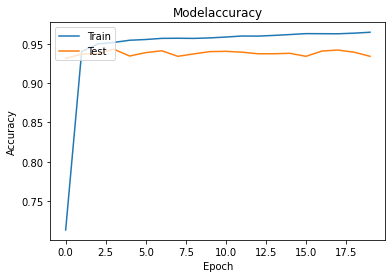

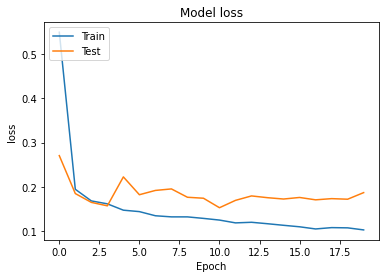

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Modelaccuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()